# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
Outliers in the Distribution of Tumor Volume for Ceftamin and Infubinol:
Possible outliers for the Ceftamin and Infubinol regimens are displayed in the box plot of final tumor volumes. Further research into the consistency of these therapies is necessary, as these outliers may reflect instances where the medicine was less successful or when individual variability dramatically impacted the outcomes.
Distribution of the Sample by Gender:
Male and female mice in the study were split almost evenly, according to the gender distribution pie chart. This sampling balance lessens the possibility of gender bias in the study's findings, increasing their applicability to both sexes.
Total Observations per Treatment Regimen:
In comparison to other medications, capomulin and ramicane have a greater sample size, according to the bar plot of total observations (Mouse ID/Timepoints) per drug regimen. This may indicate that because of their possible effectiveness, researchers gave priority to these regimens or increased their attention as the study went on.

In [2]:
%matplotlib ipympl

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='right')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [4]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {number_of_mice}")


Number of unique mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Select relevant columns to display
duplicate_mice = duplicate_mice[['Mouse ID', 'Timepoint']].drop_duplicates()

# Display the duplicate mice
duplicate_mice.head()


,Mouse ID,Timepoint
107,g989,0
329,g989,5
620,g989,10
815,g989,15
950,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
# Get the duplicate mice by Mouse ID and Timepoint
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get all the data for the duplicate Mouse IDs
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids['Mouse ID'])]

# Display the duplicate data
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Verify that duplicates have been removed
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_cleaned_mice = cleaned_data['Mouse ID'].nunique()
number_of_cleaned_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: st.sem(x)  # Using scipy.stats to calculate SEM
).reset_index()

# Display the summary statistics DataFrame
summary_stats


,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate summary statistics table using aggregation
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    SEM='sem'
)

# Display the summary statistics table
summary_statistics

,mean,median,variance,std_dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

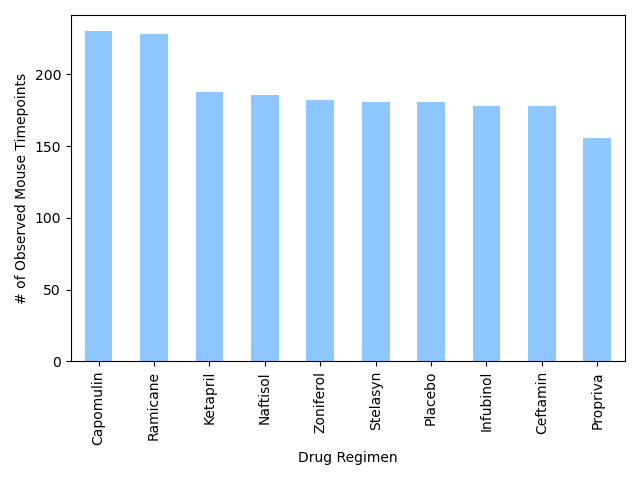

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot
drug_counts.plot(kind='bar', color='dodgerblue', alpha=0.5, align="center")

# Add titles and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


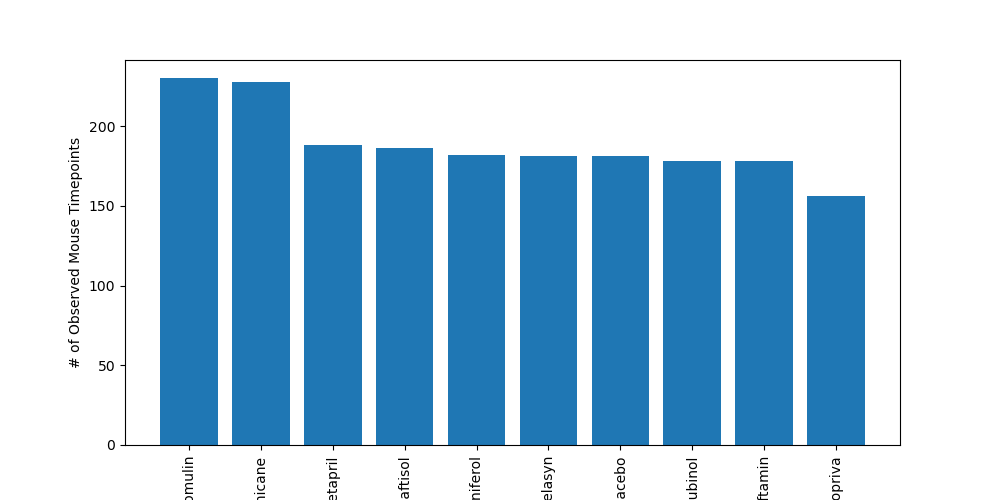

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Group the data by the drug regimen and count the number of rows for each regimen:
drug_counts = cleaned_data['Drug Regimen'].value_counts()
#Create the bar plot using pyplot:

plt.figure(figsize=(10, 5))
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

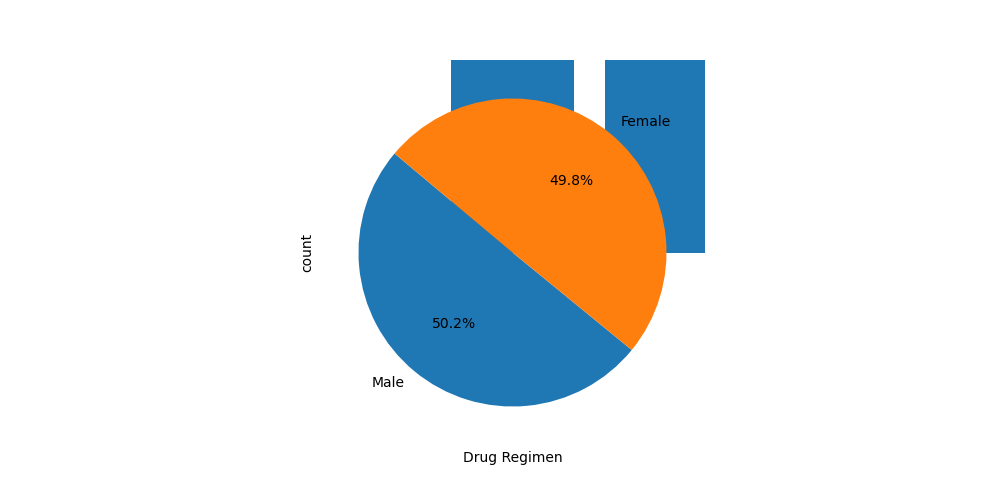

In [33]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140,)

plt.show()

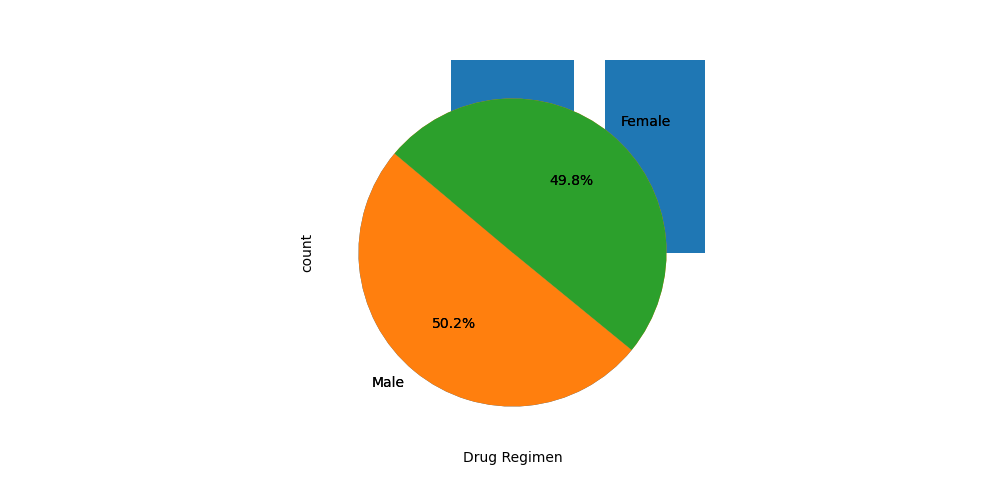

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140,)

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Filter data to include only the specified treatment regimens
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge with original data to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'])


In [16]:
# List of treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []  # Empty list to store tumor volumes

# Loop through each treatment to get the final tumor volumes
for drug in treatments:
    # Select tumor volumes for each treatment regimen
    final_tumors = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volumes.append(final_tumors)

    # Calculate quartiles and IQR
    quartiles = final_tumors.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumors[(final_tumors < lower_bound) | (final_tumors > upper_bound)]

    # Print results
    print(f"{drug} potential outliers: {outliers.values}")


Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


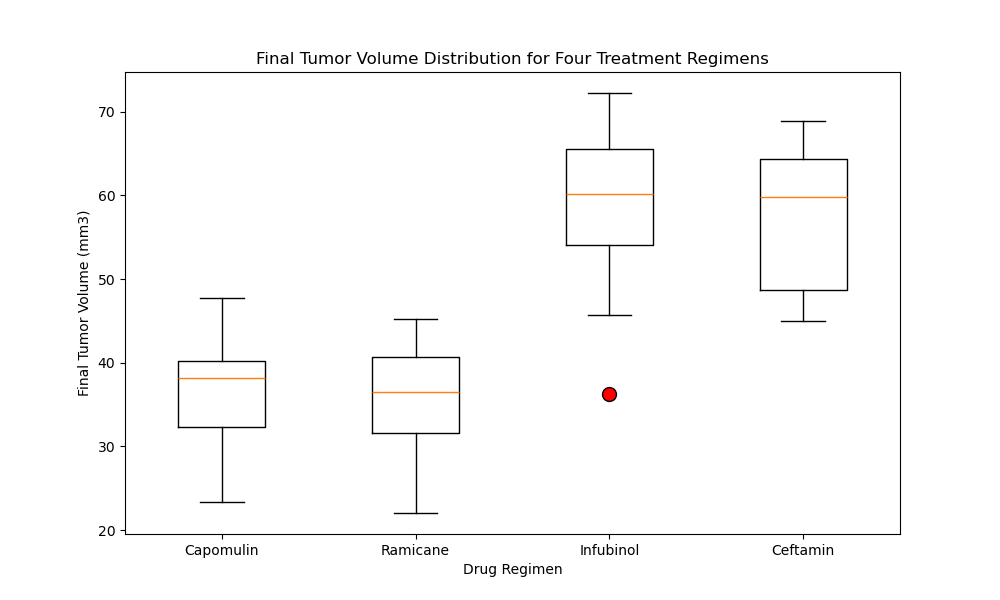

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments, flierprops={'markerfacecolor':'red', 'marker':'o', 'markersize':10})
plt.title('Final Tumor Volume Distribution for Four Treatment Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

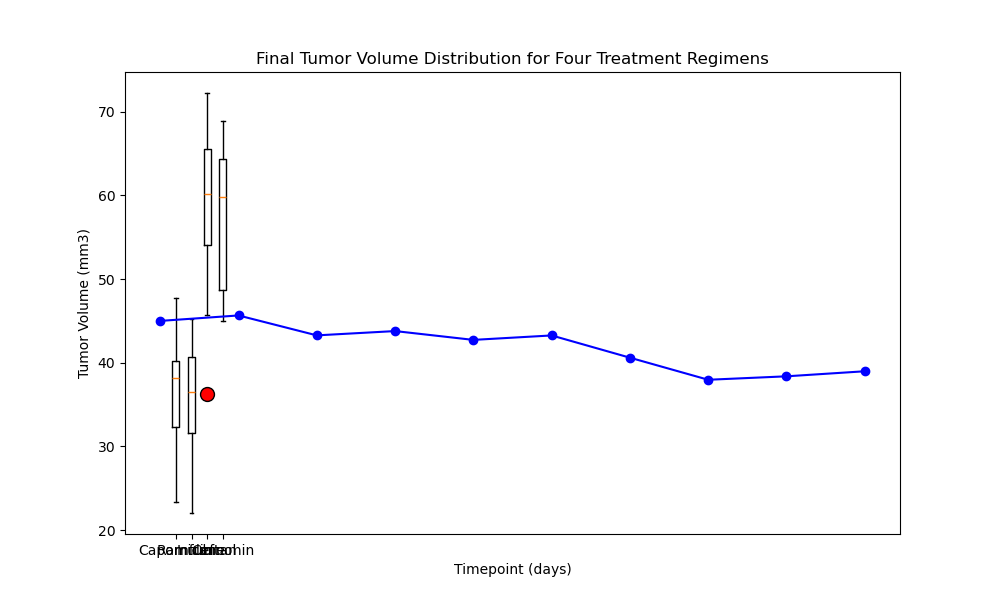

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data to include only rows where the drug regimen is Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Select a specific mouse ID from the Capomulin regimen (choose any valid Mouse ID)
selected_mouse_id = capomulin_data['Mouse ID'].iloc[0]  # This selects the first Mouse ID, you can replace it with any specific ID

# Filter data for the selected mouse ID
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

# Generate the line plot
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')

# Add title and labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

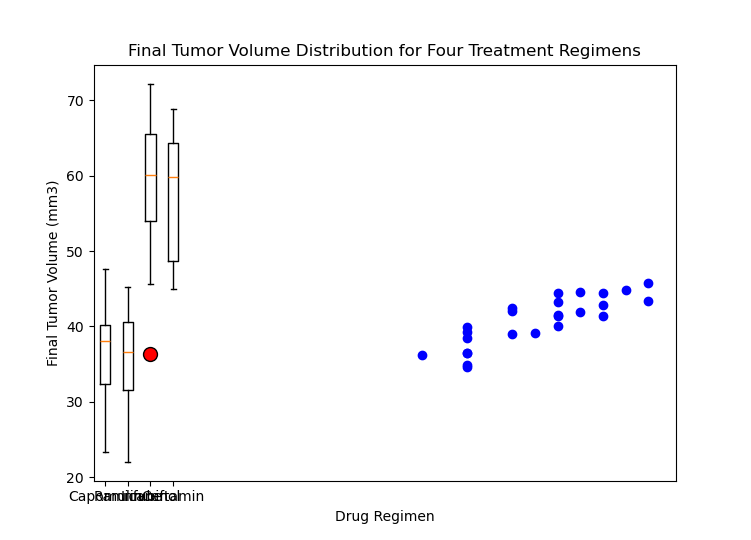

Text(60.847222222222214, 0.5, 'Average Tumor Volume (mm3)')

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)

# Get each mouse's weight data
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge the average tumor volume with mouse weight data
capomulin_summary = pd.merge(avg_tumor_volume, mouse_weight_data, on='Mouse ID')

# Generate the scatter plot
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'], color='b')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


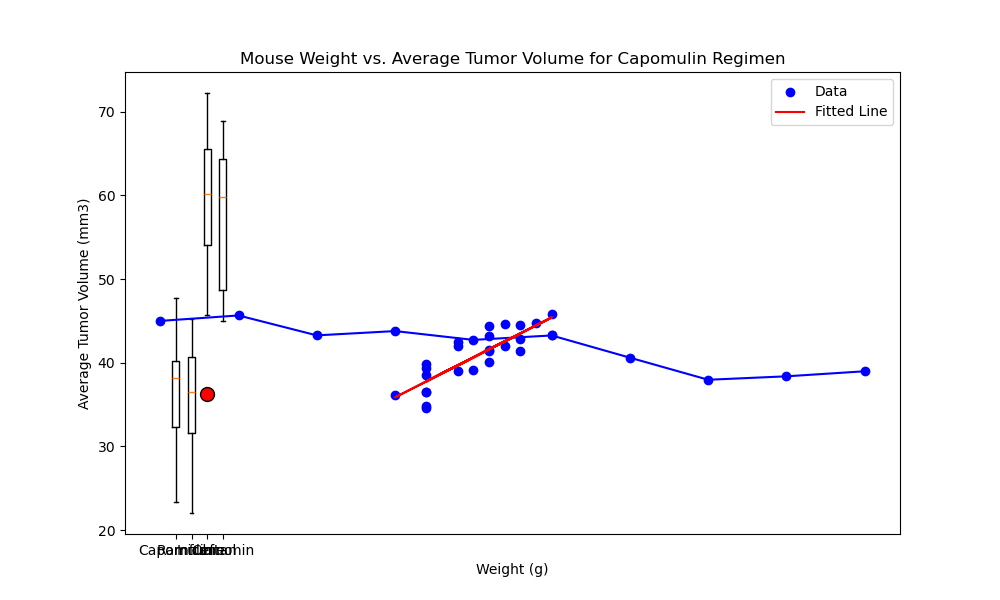

Slope: 0.95
Intercept: 21.55
R-squared: 0.71


In [28]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)

# Get each mouse's weight data
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge the average tumor volume with mouse weight data
capomulin_summary = pd.merge(avg_tumor_volume, mouse_weight_data, on='Mouse ID')

# Calculate the correlation coefficient
correlation = capomulin_summary['Weight (g)'].corr(capomulin_summary['Average Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    capomulin_summary['Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)']
)

# Plot the scatter plot and regression line
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'], color='b', label='Data')
plt.plot(
    capomulin_summary['Weight (g)'],
    slope * capomulin_summary['Weight (g)'] + intercept,
    color='r', label='Fitted Line'
)

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display plot
plt.show()

# Print regression details
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")